## Numpy

In [7]:
import numpy as np

from time import time

def timeit(func):
    def result(*args, **kwargs):
        start = time()
        res = func(*args, **kwargs)
        end = time()
        print("Function {} took {} seconds".format(func.__name__, end - start))
        return res
    return result

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [10]:
import random

@timeit
def no_np():
  x = [random.random() for _ in range(1000000)]
  x = map(lambda x: x + 1, x)

no_np()

@timeit
def with_np():
  x = np.random.rand(1000000)
  x = x + 1

with_np()

Function no_np took 0.08596515655517578 seconds
Function with_np took 0.004667997360229492 seconds


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [12]:
from math import sin, cos

@timeit
def no_np():
  lst = [random.random() for _ in range(1000000)]
  for i in lst:
    sin(i) + cos(i)

no_np()

@timeit
def with_np():
  x = np.random.rand(1000000)
  np.sin(x) + np.cos(x)

with_np()

Function no_np took 0.13875412940979004 seconds
Function with_np took 0.019147872924804688 seconds


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [17]:
@timeit
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

@timeit
def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

lst = [random.random() for _ in range(1000000)]
cube_sum(lst)
almost_variance(lst)

@timeit
def cube_sum_np(x):
    """Zwraca sume szescianow elementow"""
    return np.power(x, 3).sum()

@timeit
def almost_variance_np(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    return np.power(x - np.mean(x), 4).sum() / len(x)

np_lst = np.random.rand(1000000)
cube_sum_np(np_lst)
almost_variance_np(np_lst)

Function cube_sum took 0.06139707565307617 seconds
Function almost_variance took 0.0763850212097168 seconds
Function cube_sum_np took 0.008738040924072266 seconds
Function almost_variance_np took 0.015085220336914062 seconds


0.012479309051057428

### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [21]:
print(np.arange(1, 10).reshape(9, 1) * np.arange(1, 10))

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [34]:
points = np.random.rand(10, 5)

def dists(points):
  return np.sqrt(np.sum((points[:, None] - points) ** 2, axis=2))

print((points[:, None] - points))

[[[ 0.          0.          0.          0.          0.        ]
  [-0.32624062  0.71453939  0.1166824   0.55515773 -0.59381828]
  [-0.45416759  0.34346267  0.44070305  0.5404919  -0.04165651]
  [-0.74908603  0.41399489  0.46151054 -0.09624146 -0.39544413]
  [-0.32877271  0.46842209 -0.02920207  0.60292323  0.0286106 ]
  [-0.42274993 -0.09318612 -0.29933897  0.09088187 -0.78046379]
  [-0.71801284  0.74585404  0.10758574  0.51715866 -0.43688126]
  [ 0.05929565  0.24393045  0.38745098  0.77162671 -0.41659555]
  [-0.78523663  0.27201501 -0.19148663  0.4180041  -0.26907095]
  [-0.19811494  0.44408835  0.59186922  0.43503519 -0.18307138]]

 [[ 0.32624062 -0.71453939 -0.1166824  -0.55515773  0.59381828]
  [ 0.          0.          0.          0.          0.        ]
  [-0.12792697 -0.37107671  0.32402065 -0.01466582  0.55216177]
  [-0.42284541 -0.30054449  0.34482814 -0.65139918  0.19837415]
  [-0.00253209 -0.2461173  -0.14588447  0.04776551  0.62242888]
  [-0.0965093  -0.80772551 -0.41602136

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [38]:
def white(x):
  mean = np.mean(x, axis=0)
  std = np.std(x, axis=0)
  return (x - mean) / std

print(white(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(5, 2)))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [52]:
def closest(x, arr):
  index = np.unravel_index(np.argmin(np.abs(arr - np.full(arr.shape, x))), arr.shape)
  return arr[index]

print(closest(1.5, np.array([[1, -4, 3], [0, 0, 1.5]])))

1.5


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [63]:
def poly(x, coeff):
  return (x ** np.arange(len(coeff)) * coeff).sum()

print(poly(2, np.array([1, 2, 3])))

17


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

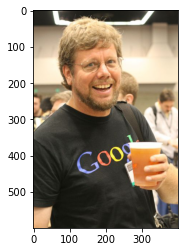

In [66]:
img = mpimg.imread('images/Guido_van_Rossum.jpg')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

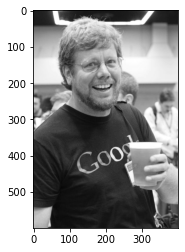

In [70]:
def gray_scale(img):
  return np.dot(img, [0.2126, 0.7152, 0.0722])

plt.imshow(gray_scale(img), cmap='gray')

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [74]:
l = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).reshape(11, 1)

p1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
p2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

def interpolate(p1, p2):
  return p1 * (1 - l) + p2 * l

print(interpolate(p1, p2))

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
 [ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2. ]
 [ 0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3. ]
 [ 0.4  0.8  1.2  1.6  2.   2.4  2.8  3.2  3.6  4. ]
 [ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
 [ 0.6  1.2  1.8  2.4  3.   3.6  4.2  4.8  5.4  6. ]
 [ 0.7  1.4  2.1  2.8  3.5  4.2  4.9  5.6  6.3  7. ]
 [ 0.8  1.6  2.4  3.2  4.   4.8  5.6  6.4  7.2  8. ]
 [ 0.9  1.8  2.7  3.6  4.5  5.4  6.3  7.2  8.1  9. ]
 [ 1.   2.   3.   4.   5.   6.   7.   8.   9.  10. ]]
